## Observations and Insights 

* Overall, Capomulin appears to be effective in decreasing tumor volume over time. However, Ramicane appears to be associated with the smallest tumor volume/size out of four treatments - Capomulin, Ramicane, Infubinol, and Ceftamin.


* There appears to be a positive correlation between mouse weight and tumor size - as indicateed in the final linear regression analysis conducted for the Capomulin drug regimen. This may indicate that either treatment was less effective in larger/overweight mice or simply that bigger mice have bigger tumors. We would need to look at change in tumor size over time for mice within different weight buckets to have a definitive answer here.


* There appears to be one outlier in the Infubinol dataset - a mouse with a tumor volume below 36.83 - which would require further investigation.

# Dependencies & Setup

In [387]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata,study_results,on='Mouse ID', how='right')

# Display the data table for preview
mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice.
number_of_mice_1 = len(mouse_study_data)

number_of_mice_1

1893

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint'])

In [61]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_study_data[duplicates]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_data_df = mouse_study_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse_study_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [66]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_data_df)

1888

## Summary Statistics

In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_df = clean_mouse_study_data_df.groupby('Drug Regimen')

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume per regimen
tumor_mean = drug_regimen_df['Tumor Volume (mm3)'].mean()
tumor_median = drug_regimen_df['Tumor Volume (mm3)'].median()
tumor_var = drug_regimen_df['Tumor Volume (mm3)'].var()
tumor_stdev = drug_regimen_df['Tumor Volume (mm3)'].std()
tumor_sem = drug_regimen_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe
drug_regimen_summary_df = pd.DataFrame({
    "Tumor Volume Mean": tumor_mean,
    "Tumor Volume Median": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Standard Deviation": tumor_stdev,
    "Tumor Volume SEM": tumor_sem
})

drug_regimen_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_summary_df_2 = clean_mouse_study_data_df.groupby('Drug Regimen').agg(**{
    'Tumor Volume Mean': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
    'Tumor Volume Median': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="median"),
    'Tumor Volume Variance' : pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="var"),
    'Tumor Volume Standard Deviation': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="std"),
    'Tumor Volume SEM': pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="sem")
})

drug_regimen_summary_df_2

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

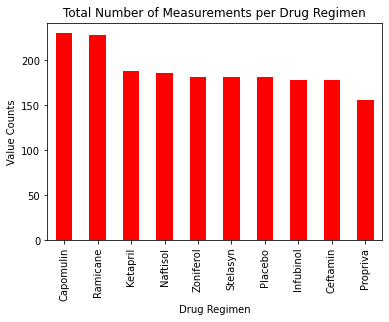

In [197]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Get the total number of measurements on each drug regiment
total_measurement = clean_mouse_study_data_df['Drug Regimen'].value_counts()

# Configure plot, ticks, formatting, size, etc.
pandas_bar_plot = total_measurement.plot(kind="bar", facecolor="red")

#Set textual properties
plt.title("Total Number of Measurements per Drug Regimen")
plt.ylabel("Value Counts")
plt.xlabel("Drug Regimen")


Text(0, 0.5, 'Value Counts')

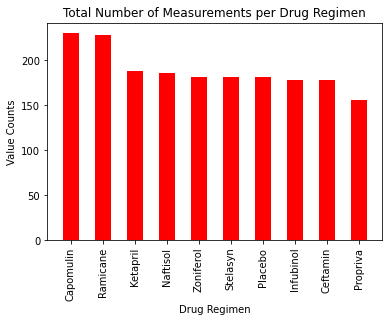

In [195]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Assign axes values
# total_measurement = clean_mouse_study_data_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(total_measurement))

# Generate bar chart using pyplot
plt.bar(x_axis, total_measurement, width=0.5, color="r", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, total_measurement.index.values, rotation='vertical')

# Give the chart a title, x label, and y label
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Value Counts")

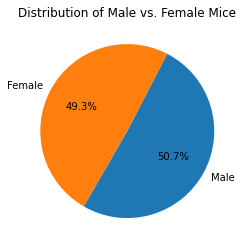

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Find gender count
gender_count = clean_mouse_study_data_df['Sex'].value_counts()

#Create gender df
gender_df = pd.DataFrame({'Gender': gender_count},
                  index=['Male', 'Female'])

#Plot Pie Chart
pie_chart_pandas = gender_df.plot(kind='pie', autopct="%1.1f%%", legend=None, y='Gender', startangle=240, title = "Distribution of Male vs. Female Mice").set_ylabel('')

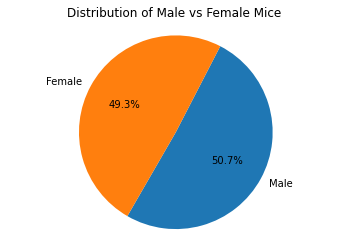

In [245]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
my_labels = 'Male','Female'
plt.pie(gender_count, labels=my_labels, autopct='%1.1f%%', startangle=240)
plt.title('Distribution of Male vs Female Mice')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [326]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Apply mask to pull data for four treatments specified
four_treatments = clean_mouse_study_data_df.loc[(clean_mouse_study_data_df['Drug Regimen'] == 'Capomulin') | (
    clean_mouse_study_data_df['Drug Regimen'] == 'Ramicane') | (clean_mouse_study_data_df['Drug Regimen'] == 'Infubinol') |
    (clean_mouse_study_data_df['Drug Regimen'] == 'Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max_df = four_treatments.groupby(['Drug Regimen','Mouse ID']).agg(**{'Timepoint': pd.NamedAgg(column='Timepoint', aggfunc="max")})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
result_4_drug_last_timepoint = timepoint_max_df.reset_index().merge(four_treatments, on=['Drug Regimen', 'Mouse ID', 'Timepoint'], how='left')

result_4_drug_last_timepoint

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
95,Ramicane,s508,45,Male,1,17,30.276232,0
96,Ramicane,u196,45,Male,18,25,40.667713,3
97,Ramicane,w678,5,Female,5,24,43.166373,0
98,Ramicane,y449,15,Male,19,24,44.183451,0


In [405]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = four_treatments['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = result_4_drug_last_timepoint.loc[result_4_drug_last_timepoint['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    vol_data.append(tumor_volume.values)
    
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {drug} tumor volume is: {lowerq}")
    print(f"The upper quartile of {drug} tumor volume is: {upperq}")
    print(f"The interquartile range of {drug} tumor volume is: {iqr}")
    print(f"The the median of {drug} tumor volume is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Tumor volume values below {lower_bound} could be outliers.")
    print(f"Tumor volume values above {upper_bound} could be outliers.")
    print()
    
    

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Tumor volume values below 17.912664470000003 could be outliers.
Tumor volume values above 54.30681135 could be outliers.

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.125164399999996 
Tumor volume values below 20.70456164999999 could be outliers.
Tumor volume values above 51.83201549 could be outliers.

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infubinol tumor volume is: 60.16518046

Text(0, 0.5, 'Tumor Volume (mm3)')

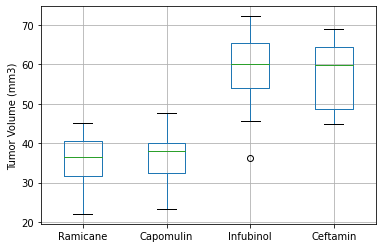

In [404]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
df = pd.DataFrame(vol_data).T
df.columns = drug_names
df.boxplot()
ax1.set_ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

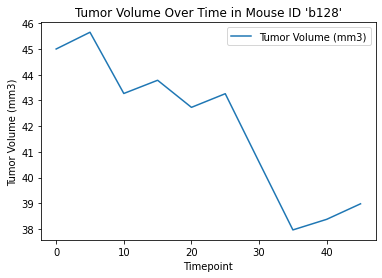

In [372]:
# Generate a line plot of tumor volume vs. time point for a RANDOM mouse treated with Capomulin
capomulin_b128_df = clean_mouse_study_data_df.loc[(clean_mouse_study_data_df['Drug Regimen'] == 'Capomulin') & (clean_mouse_study_data_df['Mouse ID'] == 'b128')]

#Plot
capomulin_b128_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', title="Tumor Volume Over Time in Mouse ID 'b128'")
plt.ylabel('Tumor Volume (mm3)')

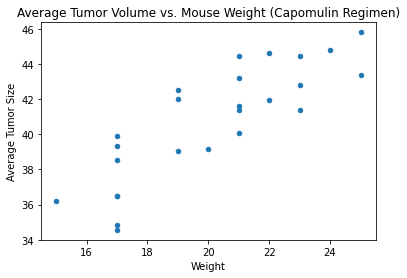

In [383]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#mask for only Capomulin regimen
capomulin_df = clean_mouse_study_data_df.loc[(clean_mouse_study_data_df['Drug Regimen'] == 'Capomulin')]

#Groupby
capomulin_groupby_mouse_id = capomulin_df.groupby('Mouse ID')

#Assign variables for mouse weight and avg tumor volume
mouse_weight = capomulin_groupby_mouse_id['Weight (g)'].mean()
avg_tumor_vol = capomulin_groupby_mouse_id['Tumor Volume (mm3)'].mean()

cap_mouse_df = pd.DataFrame({
    "Weight": mouse_weight,
    "Average Tumor Size": avg_tumor_vol
})

cap_mouse_df.plot.scatter(x="Weight", y="Average Tumor Size", title="Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")

## Correlation and Regression

In [385]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


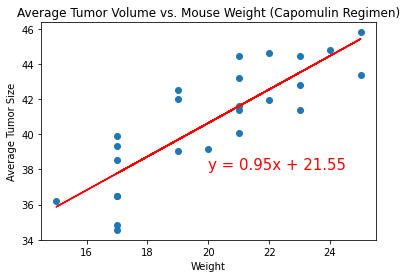

In [390]:
#Map out linear regression analysis
x_values = mouse_weight
y_values = avg_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Size')
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.show()